In [94]:
using CairoMakie, LinearAlgebra, LaTeXStrings

In [243]:
N=50
t2, t3 = nothing, nothing
σ(t) = 1/(1.0+exp(-t))
X, Y = rand(N), rand(N)
C1X, C1Y, C2X, C2Y = [], [],[],[]
t1=[]
for i in 1:N
    if X[i] ≥ Y[i] 
        append!(C1X, X[i])
        append!(C1Y, Y[i])
        append!(t1,1)
    else 
        append!(C2X, X[i])
        append!(C2Y, Y[i])
        append!(t1, 0)
    end
end
wr = 0.0:0.01:1.0
err1 = []
err2 = []
for w0 ∈ wr
    t2=Int.(w0.*X .- 0.5.* Y .>0)
    t3=σ.(30 .* w0 .* X .- 15 .* Y)
    append!(err1, sum((t1 .- t2).^2))
    append!(err2, -sum((t1 .* log.(t3 .+ 1.0e-15) .+ (1.0 .- t1) .* log.(1.0 .- t3 .+ 1.0e-15))))
end



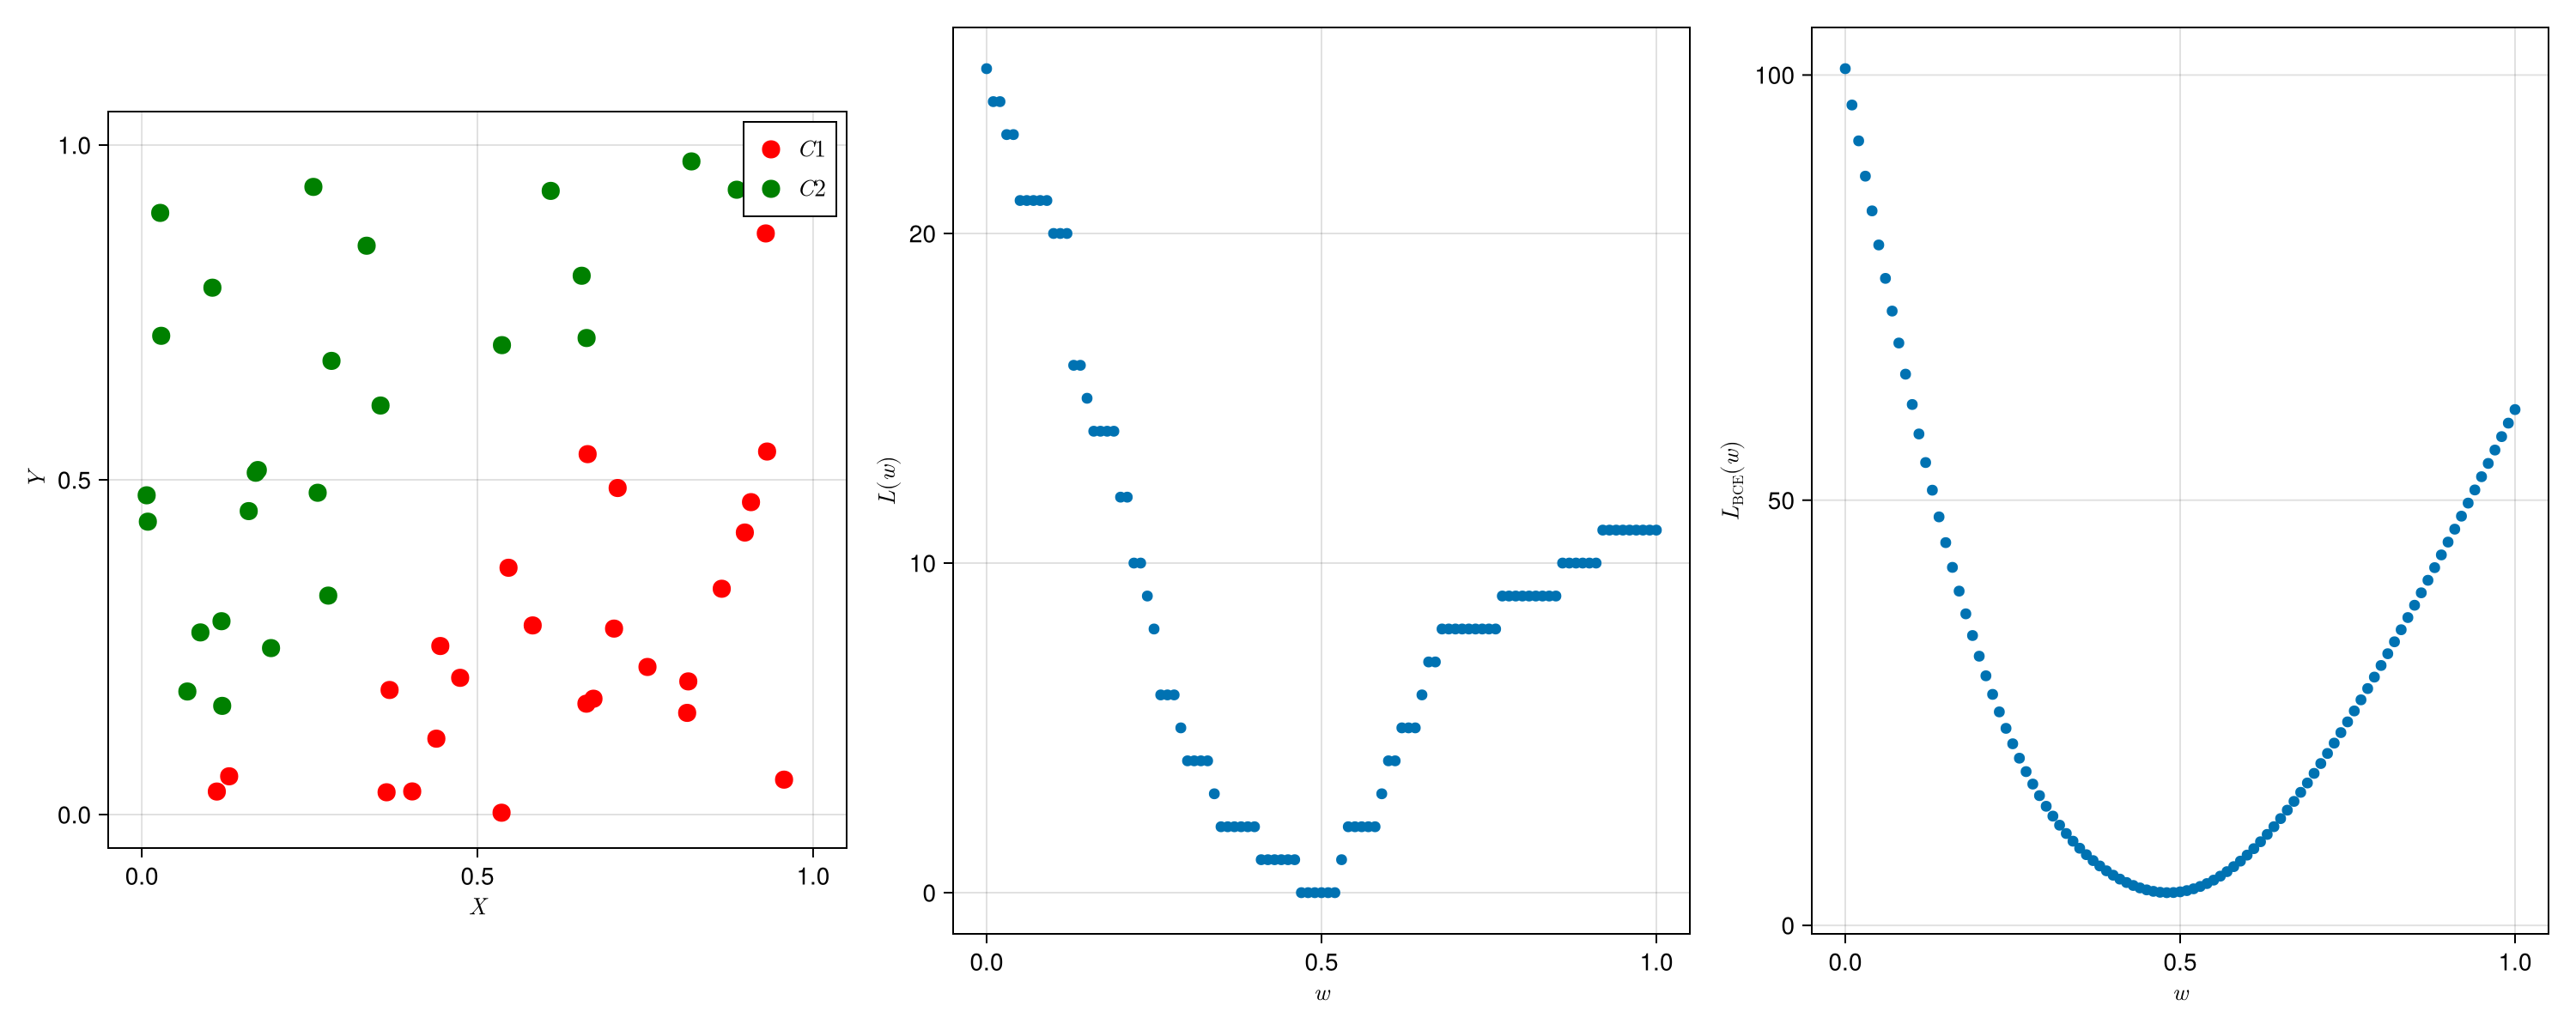

In [249]:
fig = Figure(size=(1500, 600))
ax = Axis(fig[1, 1], aspect = 1, limits = (-0.05, 1.05, -0.05, 1.05), xlabel=L"X", ylabel = L"Y")
scatter!(ax, C1X, C1Y, color=:red, markersize=15, label=L"C1")
scatter!(ax, C2X, C2Y, color=:green, markersize=15, label=L"C2")
axislegend(ax)
ax2 = Axis(fig[1, 2], xlabel = L"w", ylabel = L"L(w)")
scatter!(ax2, wr, err1)
ax3 = Axis(fig[1, 3], xlabel = L"w", ylabel = L"L_{\text{BCE}}(w)")
scatter!(ax3, wr, err2)
fig

#save("../figure/binaryclassification.png", fig)
fig

In [238]:
extrema(t3)

(0.106632232282971, 0.992444571956709)

In [240]:
[t2 σ.(5.0 .* 0.5 .* X .- 2.5 .* Y)]

500×2 Matrix{Float64}:
 1.0  0.827757
 0.0  0.207667
 0.0  0.238761
 1.0  0.604759
 0.0  0.090723
 0.0  0.269885
 1.0  0.575673
 1.0  0.385674
 1.0  0.314045
 1.0  0.34326
 ⋮    
 0.0  0.13509
 1.0  0.724675
 0.0  0.356075
 1.0  0.287538
 1.0  0.758554
 1.0  0.525034
 1.0  0.342411
 1.0  0.426858
 1.0  0.739672